### Import Modules

In [51]:
from ansys.dpf import core as dpf
from ansys.dpf.core.plotter import DpfPlotter

### Load result file and create model database

#####  - Define Datasource using result file
#####  - Define Model using this datasource


In [52]:

path = r"inputs\transient_thermal.rth"

ds = dpf.DataSources(path)
my_model = dpf.Model(ds)

### 1. List Contents of Model and Plot Elemental Volume for Named Selection named "PCB"

In [53]:
# print(my_model)
my_mesh = my_model.metadata.meshed_region
get_NSs = my_model.metadata.available_named_selections
my_mesh_scoping = my_model.metadata.named_selection("PCB")
print(my_mesh_scoping)


scoping_op = dpf.operators.mesh.from_scoping()
scoping_op.inputs.scoping.connect(my_mesh_scoping)
scoping_op.inputs.mesh.connect(my_mesh)
my_mesh_ns = scoping_op.outputs.mesh()
# print(my_mesh_ns)


get_all_volumes = my_model.results.elemental_volume.on_all_time_freqs
get_fieldContainers_volume = get_all_volumes(mesh_scoping=my_mesh_scoping).eval()
get_field_volume = get_fieldContainers_volume[-1]
# print(get_field_temperature)


my_plot = DpfPlotter()
my_plot.add_field(get_field_volume, my_mesh_ns)
my_plot.show_figure(show_axes=True)
print("Smallest Element's Volume: ", round(float(get_field_volume.data.min()),3), " m3")
print("Largest Element's Temperature: ", round(float(get_field_volume.data.max()),3), " m3")



DPF  Scoping: 
  with Elemental location and 2682 entities



Widget(value='<iframe src="http://localhost:55258/index.html?ui=P_0x1e251d3c850_9&reconnect=auto" class="pyvis…

Smallest Element's Volume:  0.0  m3
Largest Element's Temperature:  0.0  m3


### 2. Contact post processing  

##### 2A. Get Heat Flow results at last time step for the named selection "PCB_CONT_2"


##### Hints : 
##### Use nmisc operator for heatflow : dpf.operators.result.nmisc 
##### Search for 'Contact Element Heat flow' on the below page to get the item_index for the quantity

https://ansyshelp.ansys.com/account/secured?returnurl=/Views/Secured/corp/v241/en/ans_elem/Hlp_E_CONTA174.html?q=conta174


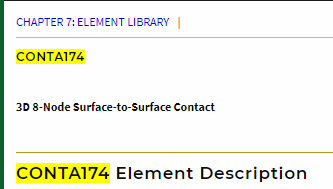 

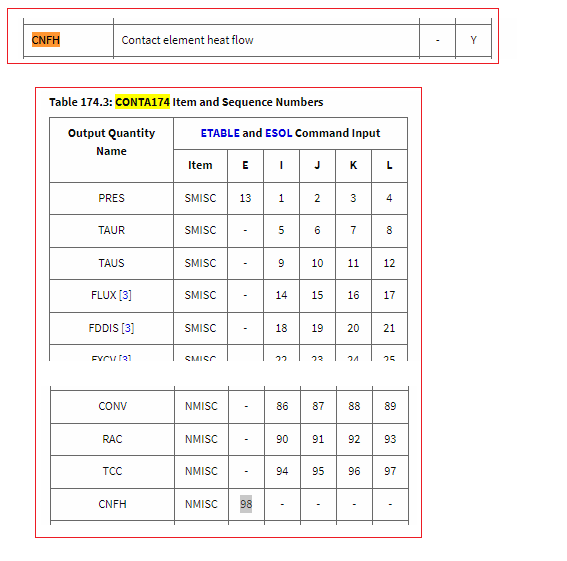

In [54]:
import numpy as np

In [55]:

my_mesh_scoping2 = my_model.metadata.named_selection("PCB_CONT_2")

scoping_op2 = dpf.operators.mesh.from_scoping()
scoping_op2.inputs.scoping.connect(my_mesh_scoping2)
scoping_op2.inputs.mesh.connect(my_mesh)

my_mesh_ns2 = scoping_op2.outputs.mesh()
# print(my_mesh_ns)


In [ ]:
contact_heatFlow_op = dpf.operators.result.nmisc(
    mesh_scoping=my_mesh_scoping2,
    data_sources=ds,
    item_index=98,
)
# print(contact_heatFlow_op)

contact_heatFlow_res = contact_heatFlow_op.outputs.fields_container()
# print(contact_heatFlow_res)

### 2B.  Plot HEAT FLOW Contour through the contact pair

In [56]:

sargs = dict(title="Contact Heat Flow [W]", title_font_size=30, label_font_size=20)
my_plot = DpfPlotter()
my_plot.add_field(contact_heatFlow_res[0], my_mesh_ns2, scalar_bar_args=sargs)
my_plot.show_figure(show_axes=True)

Widget(value='<iframe src="http://localhost:55258/index.html?ui=P_0x1e206770580_10&reconnect=auto" class="pyvi…

### 2C. Sum up (using numpy) and Print TOTAL HEAT FLOW through a contact pair 

In [57]:

heat_flow = np.sum(np.array(contact_heatFlow_res[0].data))
print("Total Heat Flow: ", round(heat_flow,2), " [W]")

Total Heat Flow:  1.76  [W]
